# Case Study: Predicting Future and Past Temperatures Using Simple Linear Regression
### Loading the Average High Temperatures into a `DataFrame`



In [1]:
import pandas as pd

In [2]:
# Dataset is saved in CSV file
nyc = pd.read_csv('/content/sample_data/Lab 1 dataset.csv')

In [3]:
# Rename the columns names
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [5]:
# Display the top 3 samples
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [6]:
# Remove 01 from the Date columns using integer division function floordiv
nyc.Date = nyc.Date.floordiv(100)

In [7]:
# Display the top 3 samples
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [8]:
# Dispaly the bottom 3 samples
nyc.tail(3)

,Date,Temperature,Anomaly
121,2016,40.8,3.4
122,2017,42.8,5.4
123,2018,38.7,1.3


In [9]:
# Display the data statistics
nyc.describe()

,Date,Temperature,Anomaly
count,124.000000,124.000000,124.000000
mean,1956.500000,37.595161,0.195161
std,35.939764,4.539848,4.539848
min,1895.000000,26.100000,-11.300000
25%,1925.750000,34.575000,-2.825000
50%,1956.500000,37.600000,0.200000
75%,1987.250000,40.600000,3.200000
max,2018.000000,47.600000,10.200000


### Splitting the Data for Training and Testing

In [10]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split

In [11]:
# this step will reshape the data and create a two dimensional array X contains only the Date and y contains only the Temperatures
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
     random_state=11)

In [12]:
# Confirm the splitting is 75%–25% train-test by checking the shapes of X_train:
X_train.shape

(93, 1)

In [13]:
# Confirm the splitting is 75%–25% train-test by checking the shapes of X_test:
X_test.shape

(31, 1)

In [14]:
# Check the X_train values
print(X_train)

[[1996]
 [1944]
 [2012]
 [1923]
 [1946]
 [2017]
 [2002]
 [2016]
 [1949]
 [1955]
 [1915]
 [1994]
 [1961]
 [1947]
 [2000]
 [1906]
 [1936]
 [1926]
 [1997]
 [2010]
 [2001]
 [1964]
 [1973]
 [1995]
 [1990]
 [1941]
 [1942]
 [1982]
 [2006]
 [1913]
 [1988]
 [1991]
 [1967]
 [1933]
 [2018]
 [1914]
 [2003]
 [1963]
 [1903]
 [1898]
 [1998]
 [1954]
 [1945]
 [2009]
 [1948]
 [1900]
 [1980]
 [1935]
 [2005]
 [1993]
 [2013]
 [1902]
 [1909]
 [1939]
 [1984]
 [1952]
 [1905]
 [1989]
 [1922]
 [1918]
 [1974]
 [1959]
 [1938]
 [1965]
 [1962]
 [1912]
 [2007]
 [2015]
 [2014]
 [1979]
 [1932]
 [1969]
 [1896]
 [1907]
 [1929]
 [1899]
 [1940]
 [1927]
 [1943]
 [1987]
 [2004]
 [1919]
 [1977]
 [1966]
 [1928]
 [1971]
 [1908]
 [1950]
 [1976]
 [1986]
 [1975]
 [1958]
 [1920]]


In [15]:
# Check the y_train values
print(y_train)

[37.  39.  44.2 35.2 40.2 42.8 45.4 40.8 43.5 35.6 38.9 31.6 31.9 43.
 37.8 42.3 34.3 37.2 39.2 38.1 38.8 40.2 40.6 42.6 46.  34.5 36.5 30.9
 47.6 46.9 34.2 39.6 41.6 45.6 38.7 36.9 32.9 34.6 35.5 39.6 45.8 37.
 31.5 33.4 30.1 37.4 38.  35.  37.4 41.  40.8 35.  39.6 36.8 33.5 42.4
 33.7 42.4 33.4 26.5 39.7 37.1 37.3 34.  38.  29.3 43.6 36.1 35.5 38.6
 47.6 35.7 34.7 40.5 37.8 36.4 30.  36.8 36.1 35.9 31.  40.6 26.1 37.1
 40.  31.5 38.3 47.6 32.6 39.3 41.7 36.4 29.7]


### Training the Model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_regression = LinearRegression()

In [18]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [19]:
# The coef_ is m in the equation y = mx + b
linear_regression.coef_

array([0.01939167])

In [20]:
# The intercept_ is b in the equation y = mx + b
linear_regression.intercept_

-0.30779820252656265

### Testing the Model

In [21]:
predicted = linear_regression.predict(X_test)

In [22]:
expected = y_test

In [23]:
# Print predicted and expected for the top 5 0samples
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Predicting Future Temperatures and Estimating Past Temperatures

In [24]:
# Now it is the time to do new prediction using coef and intercept
predict = (lambda x: linear_regression.coef_ * x +
                      linear_regression.intercept_)

In [25]:
# Predict the average high temperature for January 2019
predict(2019)

array([38.84399018])

In [26]:
# # Predict the average high temperature for January 1890
predict(1890)

array([36.34246432])

### Visualizing the Dataset with the Regression Line

In [27]:
import seaborn as sns

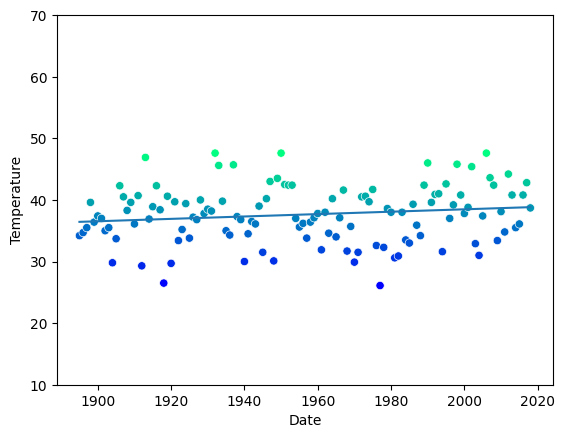

In [28]:
# Try with legend = True
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y)

# Try with legend = True

In [ ]:
# Now predict the average high temperature for 1889


In [ ]:
# Now predict the average high temperature for 2020


In [ ]:
# Well done you made it

##########################################################################
# Source: 2019 by Deitel & Associates, Inc. and                          #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
##########################################################################
